In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("dev_sent_emo.csv")
data[]

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,"Oh my God, he’s lost it. He’s totally lost it.",Phoebe,sadness,negative,0,0,4,7,"00:20:57,256","00:21:00,049"
1,2,What?,Monica,surprise,negative,0,1,4,7,"00:21:01,927","00:21:03,261"
2,3,"Or! Or, we could go to the bank, close our acc...",Ross,neutral,neutral,1,0,4,4,"00:12:24,660","00:12:30,915"
3,4,You’re a genius!,Chandler,joy,positive,1,1,4,4,"00:12:32,334","00:12:33,960"
4,5,"Aww, man, now we won’t be bank buddies!",Joey,sadness,negative,1,2,4,4,"00:12:34,211","00:12:37,505"
...,...,...,...,...,...,...,...,...,...,...,...
1104,1174,No.,Monica,sadness,negative,113,9,6,2,"00:19:28,792","00:19:29,876"
1105,1175,What? Oh my God! I’m gonna miss you so much!,Rachel,sadness,negative,113,10,6,2,"00:19:33,213","00:19:35,965"
1106,1176,I’m gonna miss you!,Monica,sadness,negative,113,11,6,2,"00:19:36,175","00:19:37,967"
1107,1177,I mean it’s the end of an era!,Rachel,sadness,negative,113,12,6,2,"00:19:39,094","00:19:40,928"


In [20]:
data.shape

(1109, 12)

In [3]:
data = data.drop(columns = ["Sr No."])
data.head()

,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,"Oh my God, he’s lost it. He’s totally lost it.",Phoebe,sadness,negative,0,0,4,7,"00:20:57,256","00:21:00,049"
1,What?,Monica,surprise,negative,0,1,4,7,"00:21:01,927","00:21:03,261"
2,"Or! Or, we could go to the bank, close our acc...",Ross,neutral,neutral,1,0,4,4,"00:12:24,660","00:12:30,915"
3,You’re a genius!,Chandler,joy,positive,1,1,4,4,"00:12:32,334","00:12:33,960"
4,"Aww, man, now we won’t be bank buddies!",Joey,sadness,negative,1,2,4,4,"00:12:34,211","00:12:37,505"


In [4]:
data.describe()

,Dialogue_ID,Utterance_ID,Season,Episode
count,1109.000000,1109.000000,1109.000000,1109.000000
mean,54.297565,5.899910,4.991885,11.998197
std,32.730408,4.740551,2.381663,7.872861
min,0.000000,0.000000,1.000000,1.000000
25%,24.000000,2.000000,3.000000,4.000000
50%,56.000000,5.000000,5.000000,11.000000
75%,82.000000,9.000000,7.000000,20.000000
max,113.000000,22.000000,9.000000,25.000000


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

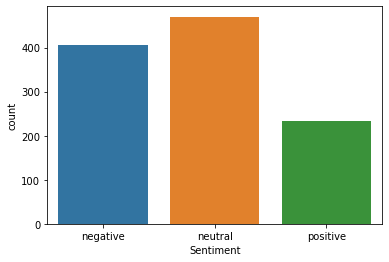

In [5]:
sns.countplot(x="Sentiment", data=data)

<AxesSubplot:xlabel='Emotion', ylabel='count'>

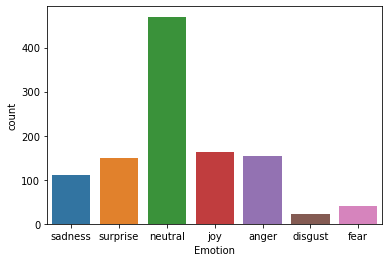

In [7]:
sns.countplot(x = "Emotion", data = data)

<AxesSubplot:xlabel='Emotion', ylabel='count'>

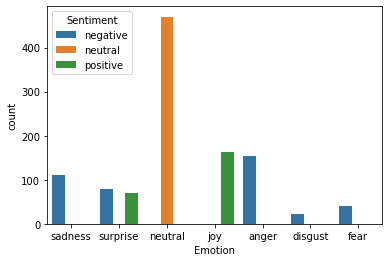

In [8]:
sns.countplot(x = 'Emotion', hue = "Sentiment", data = data)

In [15]:
data['Duration'] = pd.to_datetime(data['EndTime']) - pd.to_datetime(data['StartTime'])

<AxesSubplot:xlabel='Season', ylabel='count'>

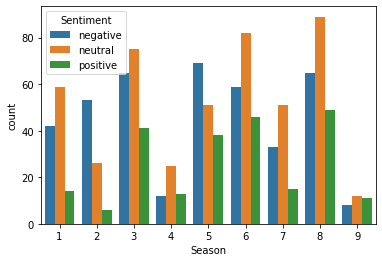

In [17]:
sns.countplot(x = "Season", hue = "Sentiment", data= data)

<AxesSubplot:xlabel='Season', ylabel='count'>

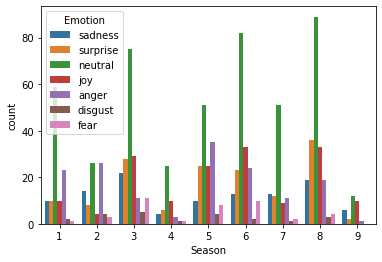

In [18]:
sns.countplot(x = "Season", hue = "Emotion", data= data)

In [22]:
data.groupby('Speaker')['Duration'].sum().loc[['Ross', 'Rachel', 'Chandler', 'Joey','Phoebe']]

Speaker
Ross       0 days 00:12:39.394000
Rachel     0 days 00:08:18.227000
Chandler   0 days 00:04:44.323000
Joey       0 days 00:08:04.902000
Phoebe     0 days 00:09:35.849000
Name: Duration, dtype: timedelta64[ns]

In [23]:
data_train = pd.read_csv("train_sent_emo.csv")

In [25]:
data_train.shape

(9989, 11)

In [27]:
data_train['Duration'] = pd.to_datetime(data_train['EndTime']) - pd.to_datetime(data_train['StartTime'])

In [28]:
data_train.groupby('Speaker')['Duration'].sum().loc[['Ross', 'Rachel', 'Chandler', 'Joey', 'Monica','Phoebe']]

Speaker
Ross       0 days 01:19:51.122000
Rachel     0 days 01:13:35.546000
Chandler   0 days 01:07:43.242000
Joey       0 days 01:18:03.022000
Monica     0 days 01:05:00.660000
Phoebe     0 days 01:10:12.158000
Name: Duration, dtype: timedelta64[ns]